# Singular Value Decomposition of an Image

Here I'll give an explanation of how Singular Value Decomposition works, and showcase some of the tools for manipulating images in python. The key here is that a black and white image is just a matrix where the numbers represent the intensity of a given pixel, which can be decomposed just like any other.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import os
from PIL import Image
# cerdit to https://www.frankcleary.com/svdimage/

In [3]:
imgPath = os.getcwd()+ '/TajMahal.jpg'
img = Image.open(imgPath)
imggray = img.convert('LA')
height, width = imggray.size[0], imggray.size[1] 

In [4]:
def display_image_in_actual_size(im_data, title=''):

    dpi = 80

    # What size does the figure need to be in inches to fit the image?
    figsize = height / float(dpi), width / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')
    plt.title(title)
    plt.show()

Here I'll load an image of Taj Mahal, and convert it to black and white.

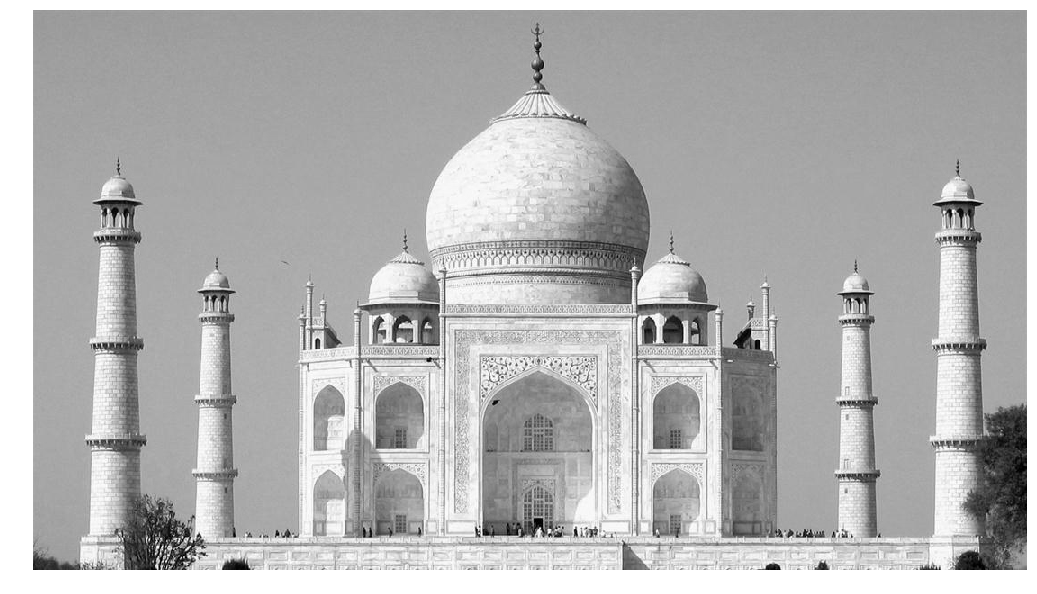

In [5]:
display_image_in_actual_size(imggray)

Now I'll convert the image data into a numpy matrix, plotting the result to show the data is unchanged.

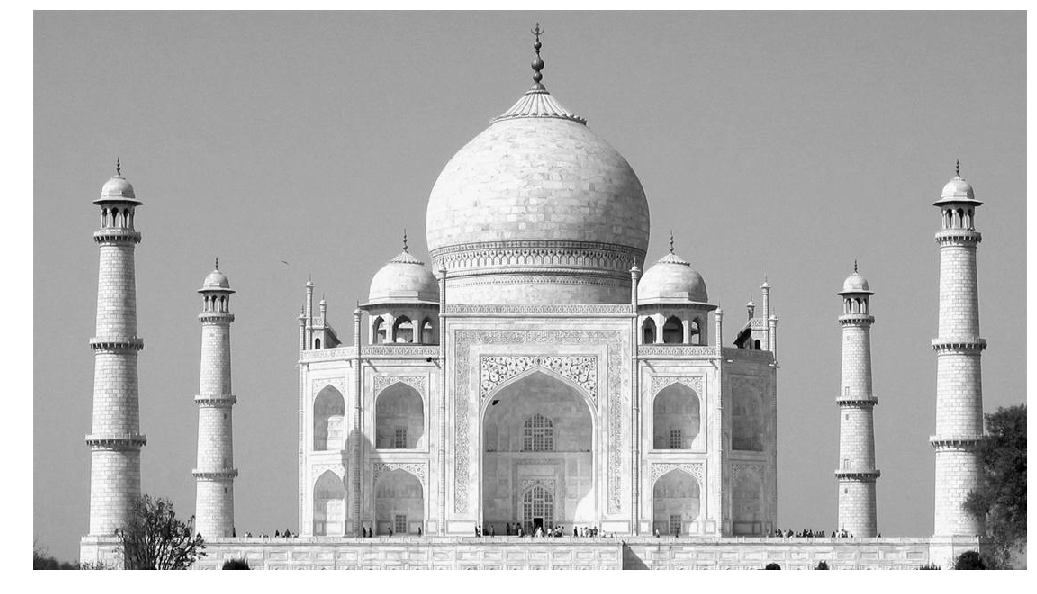

In [6]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
display_image_in_actual_size(imgmat);

Now to compute the singular value decomposition:

In [7]:
U, sigma, V = np.linalg.svd(imgmat)

In [8]:
sigma[0:31] # showing 20 most significant singular values (cuttoff is for > 1% of largest sigma value)

array([ 141210.89611066,   16258.2383275 ,    9415.2786473 ,
          7892.67696876,    6647.14765017,    6321.10600034,
          6003.72843694,    5342.60230783,    4443.68122848,
          4360.9245289 ,    3942.63677901,    3571.7427024 ,
          3485.77684769,    3073.60610261,    2935.31670017,
          2689.8746303 ,    2292.16160123,    2205.38884762,
          2074.8622252 ,    1985.08878059,    1903.05330649,
          1826.21756388,    1792.4678304 ,    1696.13686904,
          1644.78994355,    1587.44744162,    1577.61856842,
          1544.46238592,    1501.68995747,    1459.31414312,
          1406.79836003])

In [9]:
print('singular values: ',len(sigma)) # this is how many singular values exist
print('last(most insignificant) singular value',sigma[len(sigma)-1]) # the most insignificant singular value
print('first singular value/ last singular value',sigma[len(sigma)-1]/sigma[0]) # how significant the last singular value is compared to first singular value

singular values:  622
last(most insignificant) singular value 4.33469143256
first singular value/ last singular value 3.06965790314e-05


Computing an approximation of the image using the first column of $U$ and first row of $V$ reproduces the most prominent feature of the image, the light area on top and the dark area on the bottom. The darkness of the arch causes the extra darkness in the middle of the reconstruction. Each column of pixels in this image is a different weighting of the same values, $\vec{u}_1$:

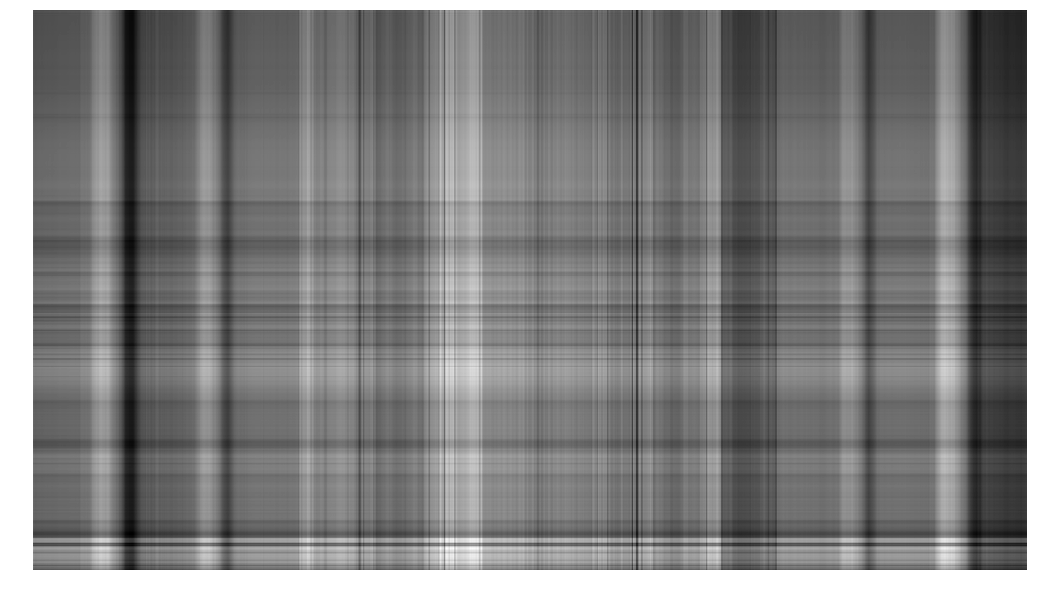

In [10]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
display_image_in_actual_size(reconstimg);

Even with just the second and third vectors, the shape of the arch begins to appear.

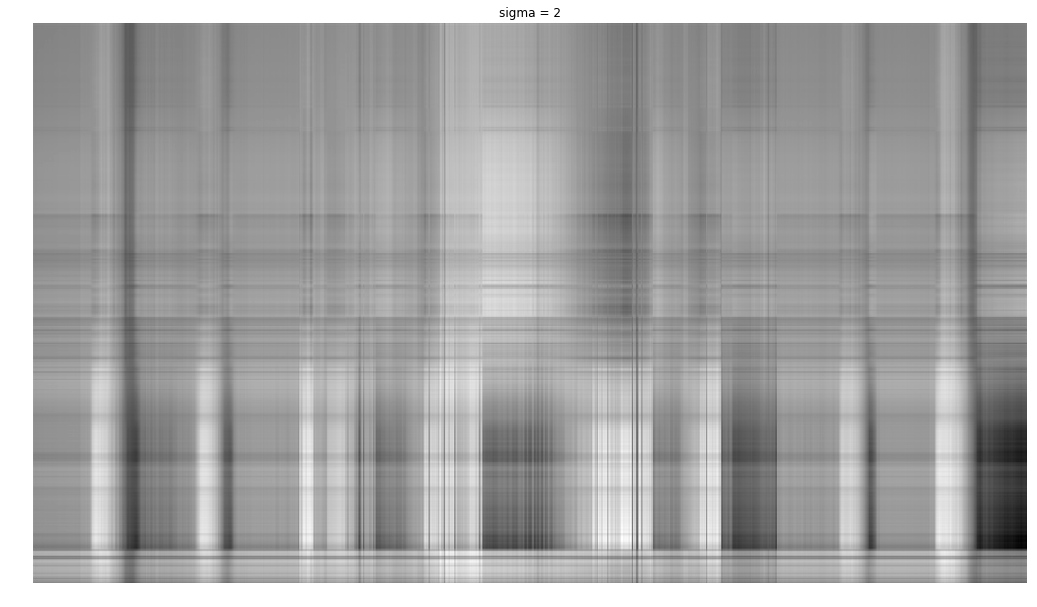

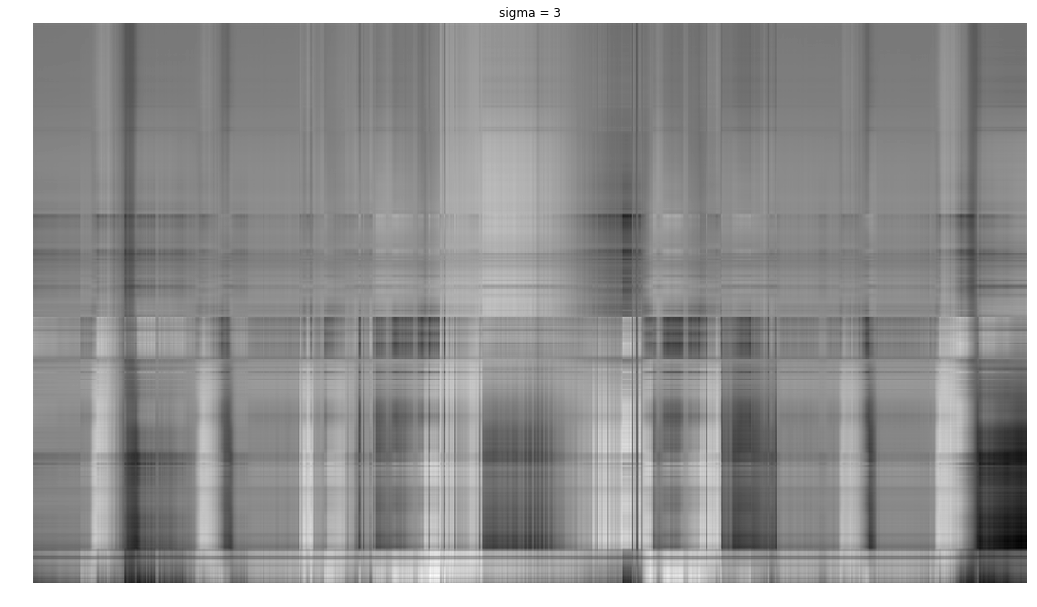

In [11]:
for i in range(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    display_image_in_actual_size(reconstimg, "sigma = %s" % i)

The loop below shows the reconstructed image using the first $n$ vectors of the singular value decomposition ($n$ is shown in the title of the plot). The first 50 vectors produce an image very close the original image, while taking up only $\frac{50*3900+50+50*2600}{3900*2600} \approx 3.2\%$ as much space as the original data.

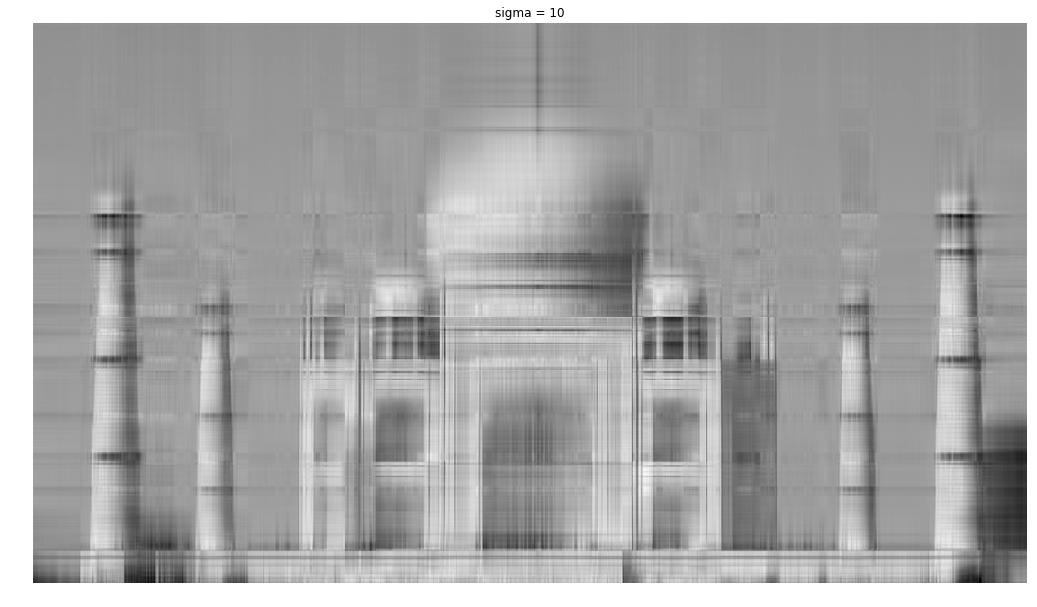

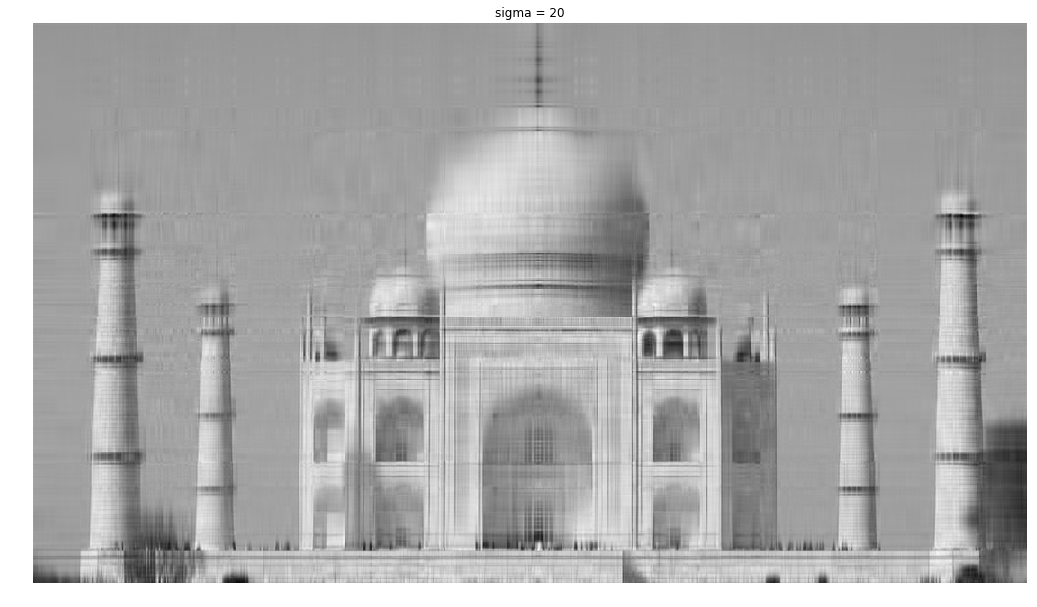

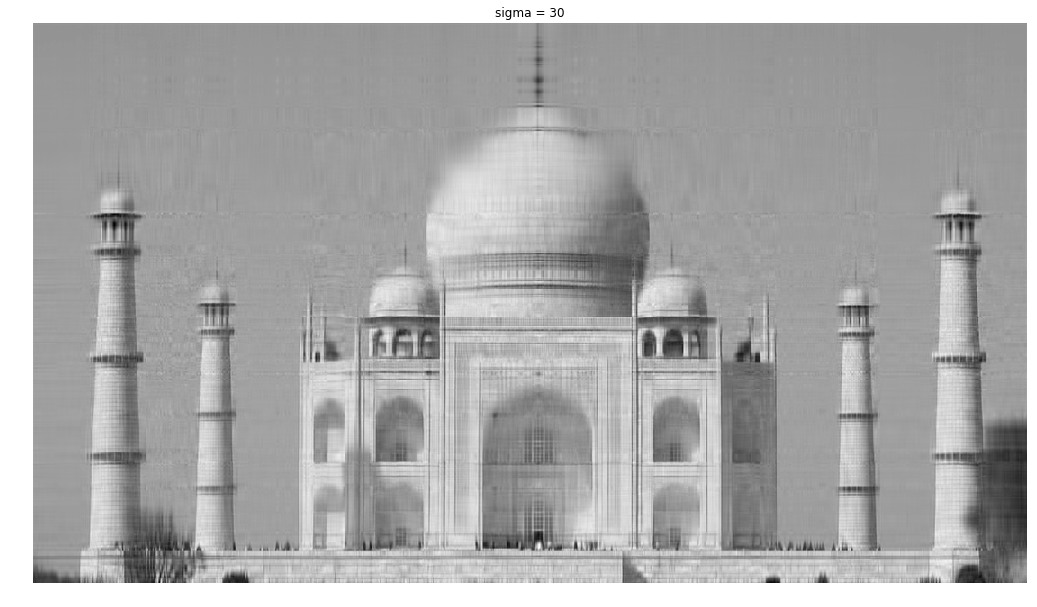

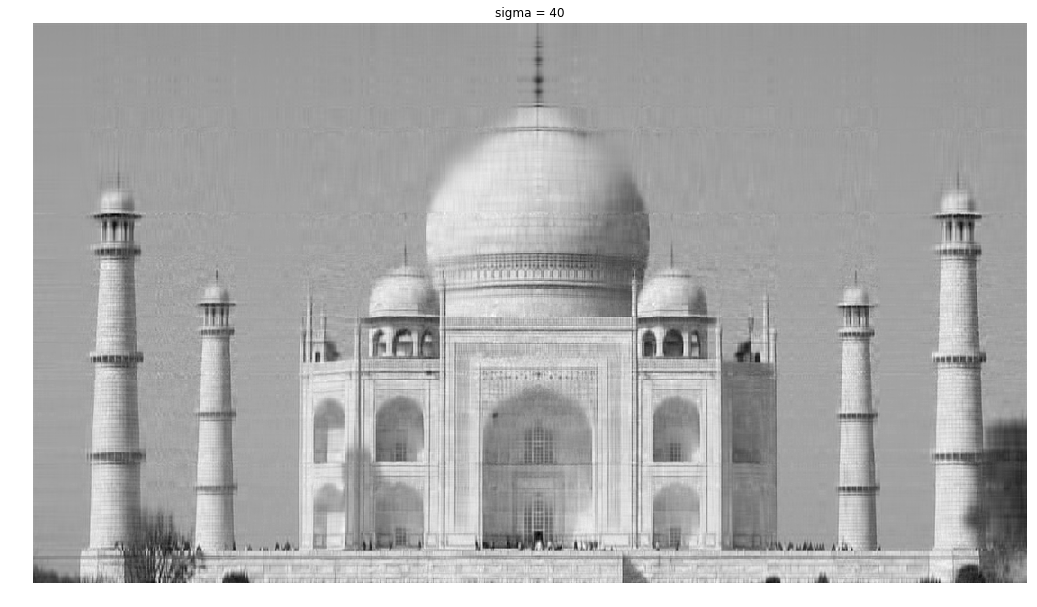

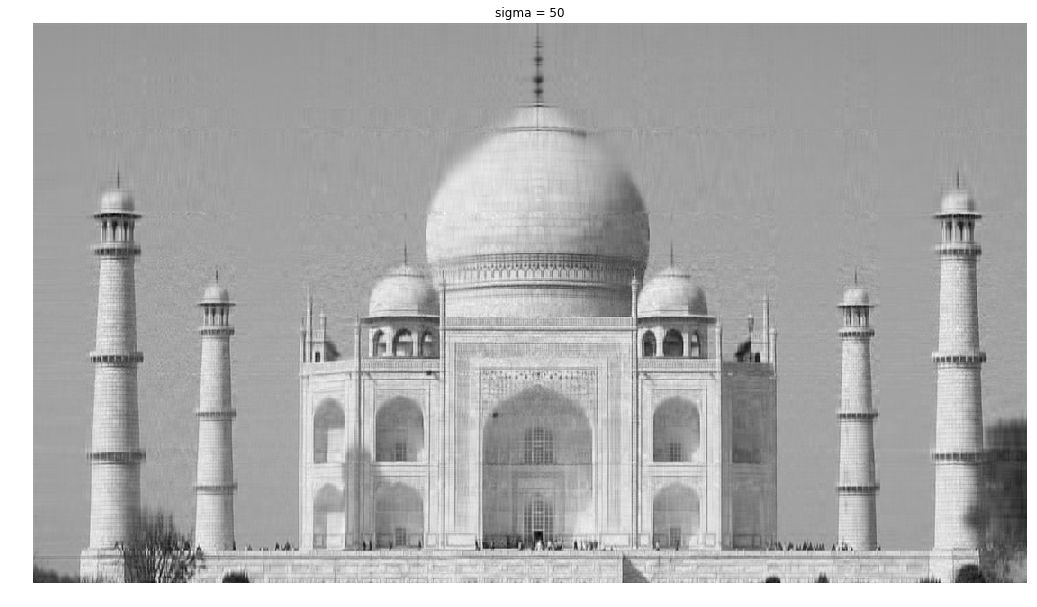

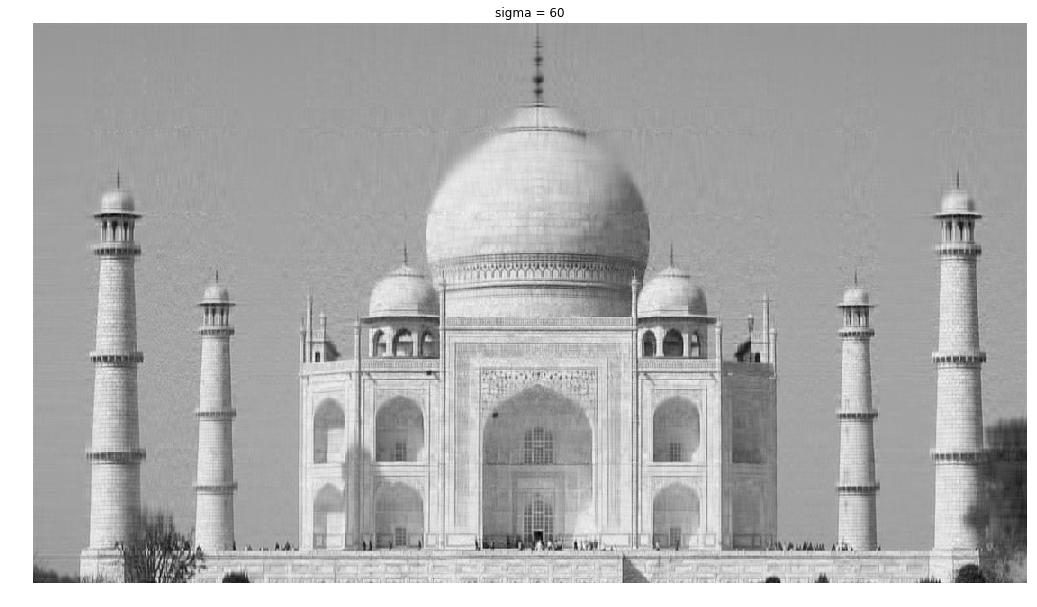

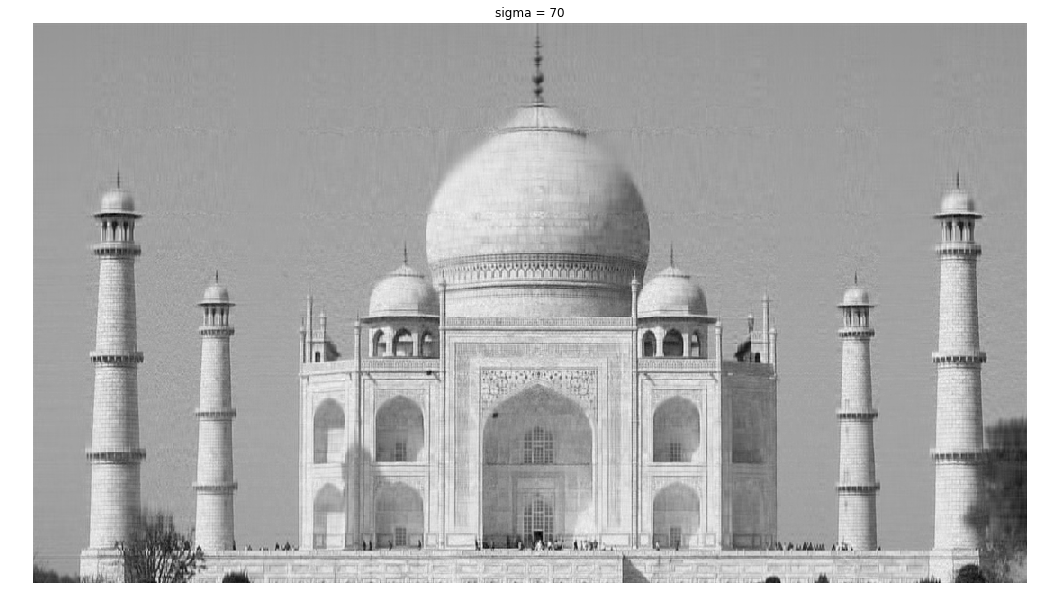

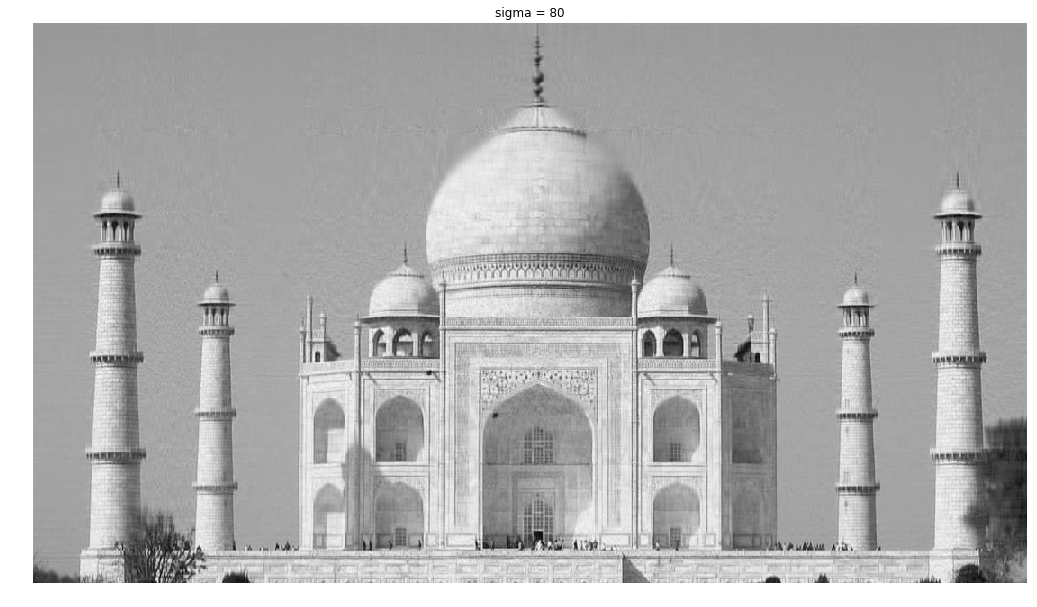

In [12]:
for i in range(10, 90, 10):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    display_image_in_actual_size(reconstimg,"sigma = %s" % i )

## After a certain point, the loss in clarity is hard to tell

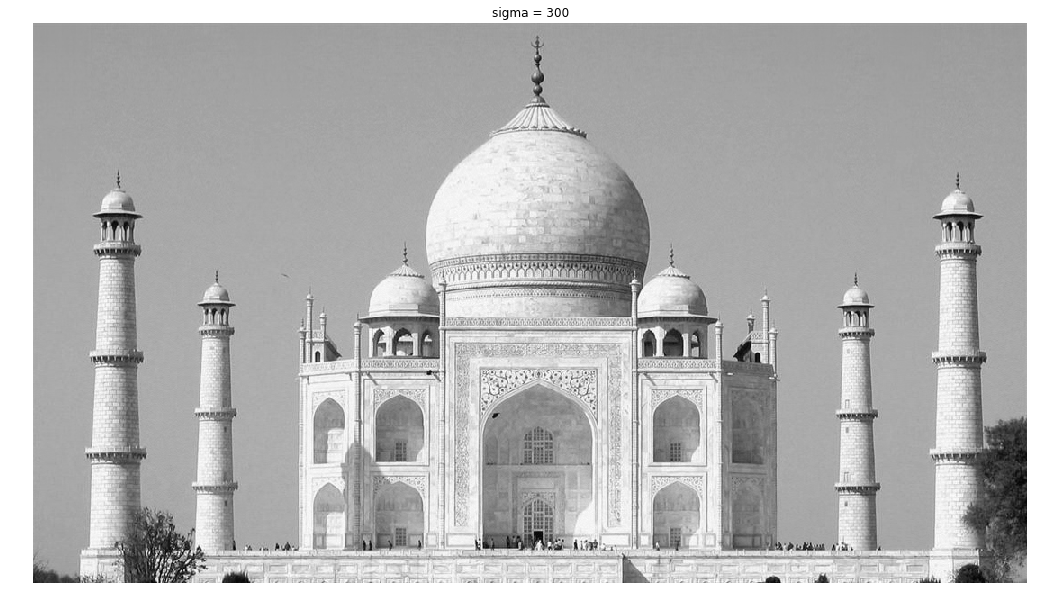

In [13]:
i = 300 
reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
display_image_in_actual_size(reconstimg,"sigma = %s" % i )